In [1]:
"""
Bayesian Network for Supply Chain Risk Mitigation using BNLearn
---

🔍 **Situation**:
- Determine the causal relationships between various factors in a supply chain to estimate the risk of disruptions.
- Use Bayesian Networks to model the dependencies between supplier delays, inventory levels, production delays, demand surges, and customer delays.

📌 **Task**:
- Bayesian Networks (BNs)
- Directed Acyclic Graph (DAG) where nodes represent variables, and edges represent causal or probabilistic dependencies.
- Uses Conditional Probability Tables (CPTs) to define relationships.
- Ideal for causal modeling, decision support, and prediction.
- Use case fit: ✅ Best for supply chain risk estimation because disruptions often follow a causal chain (e.g., raw material shortages → production delays → supplier failure).
- PGMPY also supports Markov Networks but follow undirect graphs that do not have causal relationship - not as good for supply chain risk estimation.

✨ **Action**: 
- This library is best for fitting Bayesian Networks to data and performing causal inference. 

📈 **Result**:
- Compare BNLearn with PGMPY for Bayesian Network modeling on the same dataset.

✍ **Author**: Justin Wall
📅 **Updated**: 03/04/2025 
"""

'\nBayesian Network for Supply Chain Risk Mitigation using BNLearn\n---\n\n🔍 **Situation**:\n- Determine the causal relationships between various factors in a supply chain to estimate the risk of disruptions.\n- Use Bayesian Networks to model the dependencies between supplier delays, inventory levels, production delays, demand surges, and customer delays.\n\n📌 **Task**:\n- Bayesian Networks (BNs)\n- Directed Acyclic Graph (DAG) where nodes represent variables, and edges represent causal or probabilistic dependencies.\n- Uses Conditional Probability Tables (CPTs) to define relationships.\n- Ideal for causal modeling, decision support, and prediction.\n- Use case fit: ✅ Best for supply chain risk estimation because disruptions often follow a causal chain (e.g., raw material shortages → production delays → supplier failure).\n- PGMPY also supports Markov Networks but follow undirect graphs that do not have causal relationship - not as good for supply chain risk estimation.\n\n✨ **Action**

In [2]:
# =============================================
# Create Fake Dataset for Supply Chain Risk
# =============================================
#%%
import bnlearn as bn
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(42)

# Number of samples
n_samples = 1000

# Existing features
supplier_delay = np.random.choice(["Yes", "No"], size=n_samples, p=[0.2, 0.8])
inventory_level = np.where(supplier_delay == "Yes",
                           np.random.choice(["Low", "Medium", "High"], size=n_samples, p=[0.5, 0.4, 0.1]),
                           np.random.choice(["Low", "Medium", "High"], size=n_samples, p=[0.2, 0.5, 0.3]))

production_delay = np.where(np.isin(inventory_level, ["Low"]),
                            np.random.choice(["Yes", "No"], size=n_samples, p=[0.4, 0.6]),
                            np.random.choice(["Yes", "No"], size=n_samples, p=[0.1, 0.9]))

demand_surge = np.random.choice(["Yes", "No"], size=n_samples, p=[0.15, 0.85])

# New feature 1: Shipping Issues (random, but more likely with Supplier Delay)
shipping_issues = np.where(supplier_delay == "Yes",
                           np.random.choice(["Yes", "No"], size=n_samples, p=[0.4, 0.6]),
                           np.random.choice(["Yes", "No"], size=n_samples, p=[0.1, 0.9]))

# New feature 2: Labor Shortages (random, but more likely when Inventory is Low)
labor_shortages = np.where(inventory_level == "Low",
                           np.random.choice(["Yes", "No"], size=n_samples, p=[0.5, 0.5]),
                           np.random.choice(["Yes", "No"], size=n_samples, p=[0.2, 0.8]))

# Updated Customer Delay (Now depends on Shipping Issues and Demand Surge too)
customer_delay = np.where((production_delay == "Yes") & (demand_surge == "Yes") & (shipping_issues == "Yes"),
                          np.random.choice(["Yes", "No"], size=n_samples, p=[0.7, 0.3]),
                          np.random.choice(["Yes", "No"], size=n_samples, p=[0.3, 0.7]))

# Create DataFrame
data = pd.DataFrame({
    "Supplier_Delay": supplier_delay,
    "Inventory_Level": inventory_level,
    "Production_Delay": production_delay,
    "Demand_Surge": demand_surge,
    "Shipping_Issues": shipping_issues,
    "Labor_Shortages": labor_shortages,
    "Customer_Delay": customer_delay
})

# Show first 5 rows
print(data.head())
#%%

  Supplier_Delay Inventory_Level Production_Delay Demand_Surge  \
0             No          Medium               No           No   
1             No          Medium               No           No   
2             No            High               No           No   
3             No          Medium               No           No   
4            Yes          Medium               No           No   

  Shipping_Issues Labor_Shortages Customer_Delay  
0             Yes              No             No  
1              No              No            Yes  
2              No              No             No  
3              No              No             No  
4             Yes              No            Yes  


In [3]:
# =============================================
# Create Bayesian Network Structure
# =============================================
#%%
# Learn the Bayesian Network structure
model = bn.structure_learning.fit(data, methodtype='hc', scoretype='bic')

# Print the discovered structure
print(model)
#%%

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
{'model': <pgmpy.base.DAG.DAG object at 0x000002C786CB53D0>, 'model_edges': [('Supplier_Delay', 'Shipping_Issues'), ('Inventory_Level', 'Supplier_Delay'), ('Inventory_Level', 'Labor_Shortages'), ('Production_Delay', 'Inventory_Level')], 'adjmat': target            Supplier_Delay  Inventory_Level  Production_Delay  \
source                                                                
Supplier_Delay             False            False             False   
Inventory_Level             True            False             False   
Production_Delay           False             True             False   
Demand_Surge               False            False             False   
Shipping_Issues            False            False             False   
Labor_Shortages            False            False             False   
Customer_Delay             Fal

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


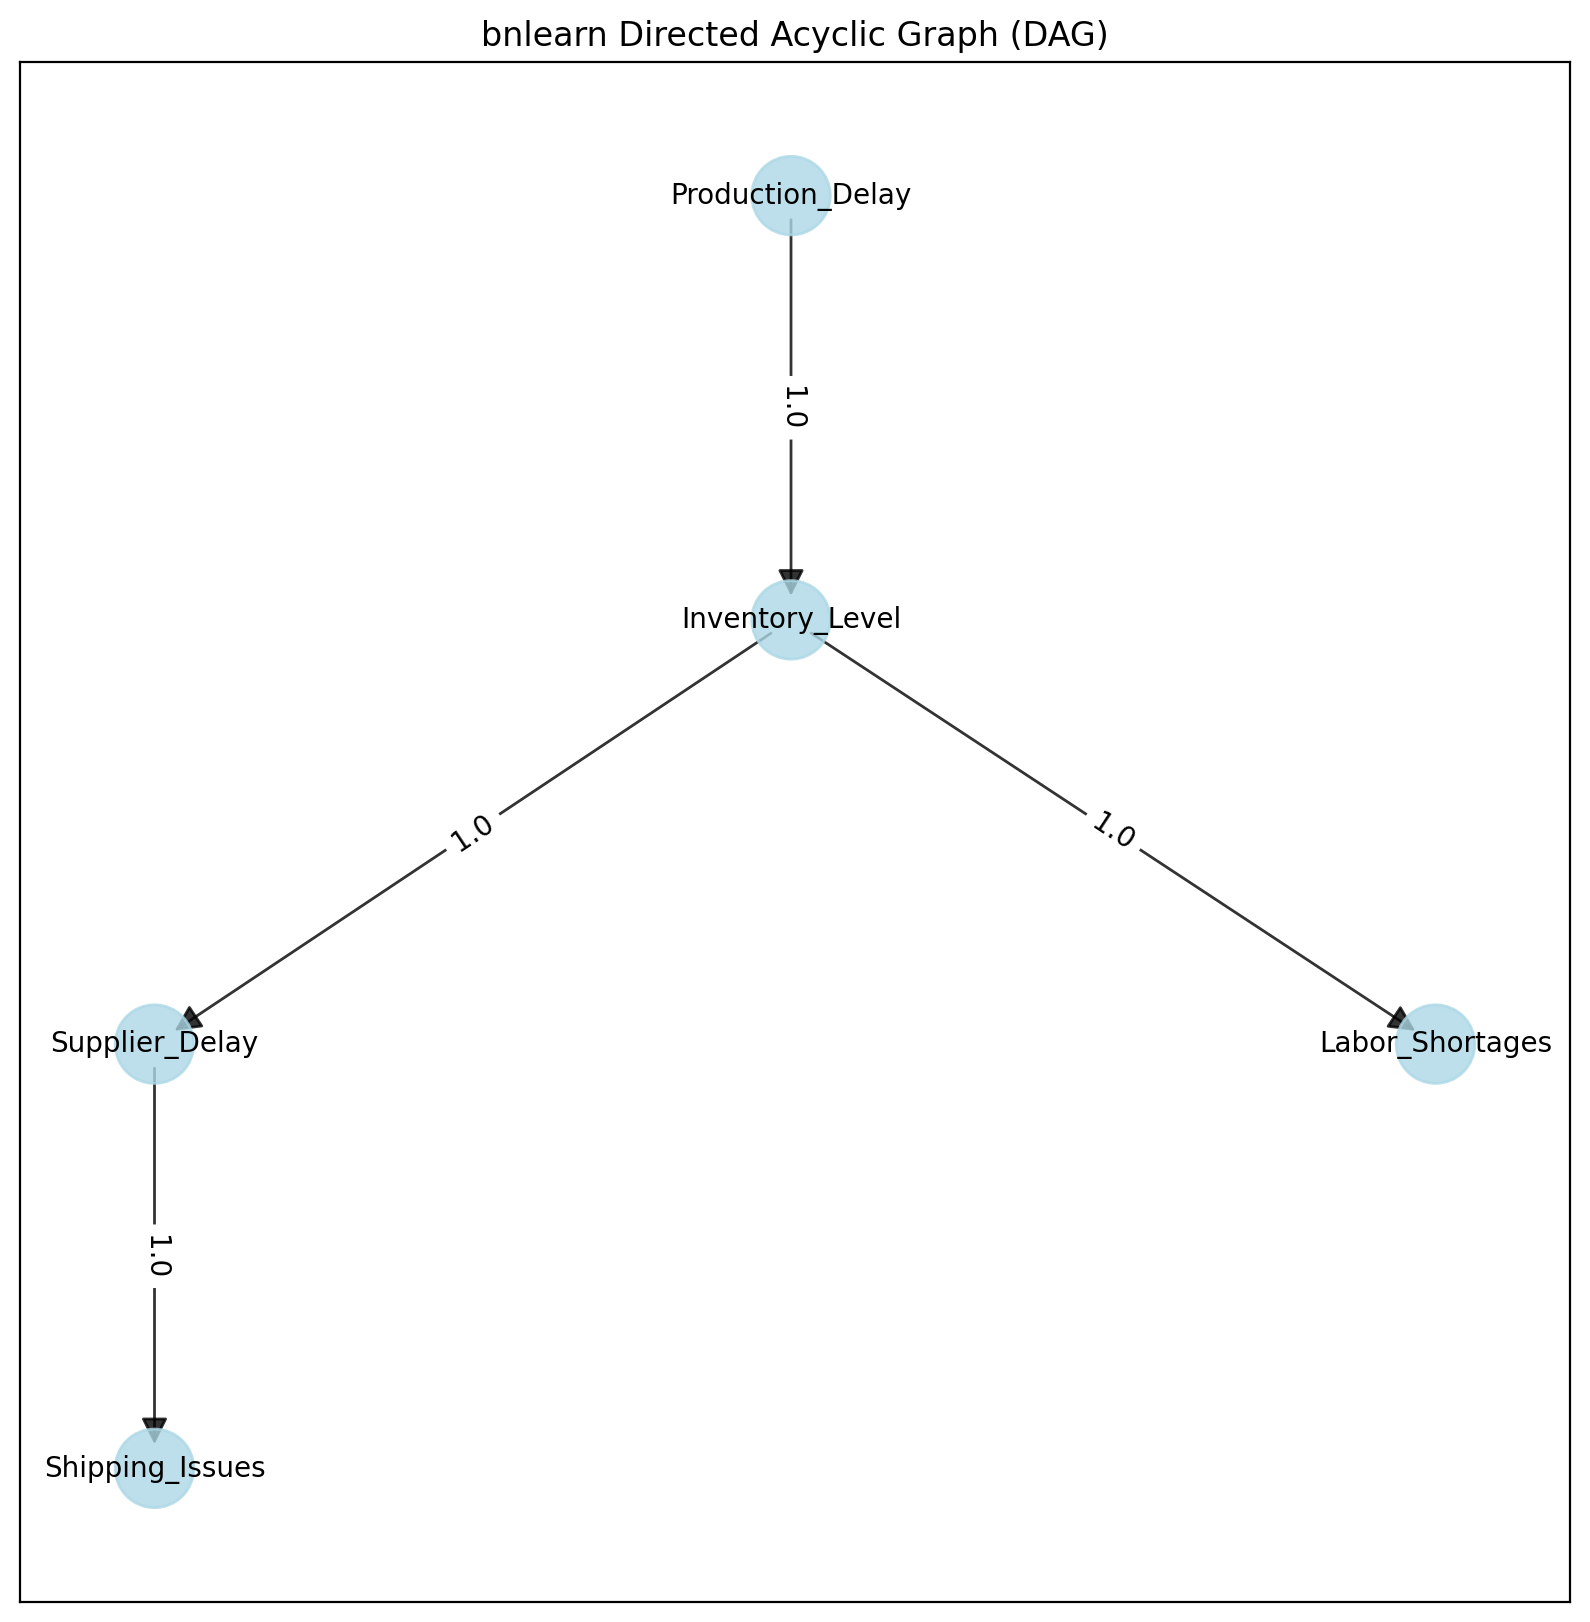

{'fig': <Figure size 2000x2000 with 1 Axes>,
 'ax': <Figure size 2000x2000 with 1 Axes>,
 'pos': {'Supplier_Delay': (71.312, 90.0),
  'Shipping_Issues': (71.312, 18.0),
  'Inventory_Level': (151.31, 162.0),
  'Labor_Shortages': (232.31, 90.0),
  'Production_Delay': (151.31, 234.0)},
 'G': <networkx.classes.digraph.DiGraph at 0x2c786cc9690>,
 'node_properties': {'Supplier_Delay': {'node_color': '#ADD8E6',
   'node_size': 800},
  'Inventory_Level': {'node_color': '#ADD8E6', 'node_size': 800},
  'Production_Delay': {'node_color': '#ADD8E6', 'node_size': 800},
  'Demand_Surge': {'node_color': '#ADD8E6', 'node_size': 800},
  'Shipping_Issues': {'node_color': '#ADD8E6', 'node_size': 800},
  'Labor_Shortages': {'node_color': '#ADD8E6', 'node_size': 800},
  'Customer_Delay': {'node_color': '#ADD8E6', 'node_size': 800}},
 'edge_properties': {('Supplier_Delay',
   'Shipping_Issues'): {'color': '#000000', 'weight': 1.0, 'pvalue': 1, 'value': 1.0},
  ('Inventory_Level', 'Supplier_Delay'): {'color'

In [4]:
# =============================================
# Plot the model
# =============================================
#%%
bn.plot(model)
#%%

In [5]:
# =============================================
# Model Inferences
# =============================================
#%%
# Learn the probabilities (CPTs)
model = bn.parameter_learning.fit(model, data)

# Show learned parameters
bn.print_CPD(model)
#%%

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Supplier_Delay:
+---------------------+-----+-------------------------+
| Inventory_Level     | ... | Inventory_Level(Medium) |
+---------------------+-----+-------------------------+
| Supplier_Delay(No)  | ... | 0.6837113402061856      |
+---------------------+-----+-------------------------+
| Supplier_Delay(Yes) | ... | 0.31628865979381443     |
+---------------------+-----+-------------------------+
[bnlearn] >CPD of Shipping_Issues:
+----------------------+---------------------+---------------------+
| Supplier_Delay       | Supplier_Delay(No)  | Supplier_Delay(Yes) |
+----------------------+---------------------+---------------------+
| Shipping_Issues(No)  | 0.7349019607843137  | 0.5379310344827586  |
+----------------------+---------------------+---------------------+


{'Supplier_Delay':   Supplier_Delay Inventory_Level         p
 0             No            High  0.681561
 1             No             Low  0.532374
 2             No          Medium  0.683711
 3            Yes            High  0.318439
 4            Yes             Low  0.467626
 5            Yes          Medium  0.316289,
 'Shipping_Issues':   Shipping_Issues Supplier_Delay         p
 0              No             No  0.734902
 1              No            Yes  0.537931
 2             Yes             No  0.265098
 3             Yes            Yes  0.462069,
 'Inventory_Level':   Inventory_Level Production_Delay         p
 0            High               No  0.298997
 1            High              Yes  0.286070
 2             Low               No  0.244862
 3             Low              Yes  0.412935
 4          Medium               No  0.456140
 5          Medium              Yes  0.300995,
 'Labor_Shortages':   Labor_Shortages Inventory_Level         p
 0              No         

In [6]:
# =============================================
# Causal Inferences
# =============================================
#%%
# Perform inference: What happens if we set Production_Delay = "No"?
query = bn.inference.fit(model, variables=["Inventory_Level"], evidence={"Production_Delay": "No"})
print(query)
#%%

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+-------------------+----------+
|    | Inventory_Level   |        p |
+====+===================+==========+
|  0 | High              | 0.298997 |
+----+-------------------+----------+
|  1 | Low               | 0.244862 |
+----+-------------------+----------+
|  2 | Medium            | 0.45614  |
+----+-------------------+----------+
+-------------------------+------------------------+
| Inventory_Level         |   phi(Inventory_Level) |
+=========================+========================+
| Inventory_Level(High)   |                 0.2990 |
+-------------------------+------------------------+
| Inventory_Level(Low)    |                 0.2449 |
+-------------------------+------------------------+
| Inventory_Level(Medium) |                 0.4561 |
+-------------------------+------------------------+
